# Project: Wrangling and Analyze Data

## Data gathering

In [1]:
# load required libraries 
import pandas as pd
import numpy as np
import requests

In [2]:
# load the twitter archive dataset and view the first 2 rows
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(2)



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
# download the image prediction dataset programmatically using requests
import requests
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv' ,mode ='wb') as file:
    file.write(response.content)
    


In [4]:
# Read the downloaded image prediction dataset and view the first 5 rows
image_pred =pd.read_csv('image-predictions.tsv', sep="\t")
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Gather data from twitter using tweepy

In [5]:
# import libraries to gather data from twitter using API
import tweepy as tw
from tweepy import OAuthHandler
import json as js

In [6]:

with open('key.json') as f:
    key = js.load(f)

In [7]:
# Secret keys loaded from a secret json file. 
consumer_key = key["API_key"]
consumer_secret = key["API_key_secret"]
access_token = key["Access_token"]
access_secret = key["Access_token_secret"]

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth, wait_on_rate_limit=True)

In [8]:
## code to download the twitter archive data based on tweets ids in the twitter archive enhanced dataset
'''
from timeit import default_timer as timer

tweet_ids = df_archive.tweet_id.values


# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            js.dump(tweet._json, outfile)
            outfile.write('\n')
        except tw.errors.HTTPException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

'''



'\nfrom timeit import default_timer as timer\n\ntweet_ids = df_archive.tweet_id.values\n\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            js.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tw.errors.HTTPException as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n\n'

In [9]:
## Read the downloaded json data line by line to create a dataset with retweet_id, retweet_count and favorite_count
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        data = js.loads(line)
        keys = data.keys()
        user = data.get('user')
        tweet_id= data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
df_json = pd.DataFrame(df_list, columns =['tweet_id', 'retweet_count', 'favorite_count'])
df_json.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


## Assessing Data

### Visual


In [10]:
# make copies of the three datasets to avoid keep the original data as it was
df_archive_clean = df_archive.copy()
df_image_clean = image_pred.copy()
df_json_clean = df_json.copy()

In [11]:
#visual assessment of the three datasets
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
#visual assessment of the image prediction dataset
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
# visual assessment of the json dataset
df_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Programmatic assessment

In [14]:
#check for correct data types and missingness
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# take a random sample of 10 samples
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
292,838083903487373313,NaN,NaN,2017-03-04 17:49:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's puppears to be rare as al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838083903...,13,10,Daisy,None,None,None,None
2315,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,None,None,None,None
2312,666776908487630848,NaN,NaN,2015-11-18 00:36:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Josep. He is a Rye Manganese mix. Can ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666776908...,5,10,Josep,None,None,None,None
2016,672169685991993344,NaN,NaN,2015-12-02 21:45:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradley. That is his sandwich. He carr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672169685...,10,10,Bradley,None,None,None,None
1233,712809025985978368,NaN,NaN,2016-03-24 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stubert. He just arrived. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712809025...,10,10,Stubert,None,None,None,None
1232,713175907180089344,NaN,NaN,2016-03-25 01:29:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Opie and Clarkus. Clarkus fell as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713175907...,10,10,Opie,None,None,None,None
1265,709901256215666688,NaN,NaN,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",WeRateDogs stickers are here and they're 12/10...,NaN,NaN,NaN,"http://goo.gl/ArWZfi,https://twitter.com/dog_r...",12,10,None,None,None,None,None
1872,675146535592706048,NaN,NaN,2015-12-11 02:54:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. He's yelling at the carpet. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535...,7,10,Coops,None,None,None,None
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
845,766423258543644672,NaN,NaN,2016-08-18 23:55:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadoe. Her tongue flies out of her mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766423258...,9,10,Shadoe,None,None,None,None


In [16]:
#check for the unique dog names
df_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [17]:
#check for duplicates
df_archive_clean.duplicated().sum()

0

In [18]:
# check for outliers
df_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
#check for correct data types and missingness in the image prediction dataset
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
#view a sample of 10 in the image prediction dataset
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1670,813081950185472002,https://pbs.twimg.com/media/C0ilsa1XUAEHK_k.jpg,2,Doberman,0.909951,True,kelpie,0.042649,True,miniature_pinscher,0.023004,True
1686,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True
1426,772581559778025472,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,3,Newfoundland,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,0.059476,True
1374,762699858130116608,https://pbs.twimg.com/media/CpWnecZWIAAUFwt.jpg,1,kelpie,0.519047,True,German_shepherd,0.296069,True,dingo,0.061005,False
474,675147105808306176,https://pbs.twimg.com/media/CV6atgoWcAEsdv6.jpg,1,golden_retriever,0.949215,True,Labrador_retriever,0.016765,True,flat-coated_retriever,0.010637,True
647,681679526984871937,https://pbs.twimg.com/media/CXXP5O4WEAA4dgS.jpg,1,birdhouse,0.472351,False,teddy,0.142058,False,pot,0.032906,False
906,700167517596164096,https://pbs.twimg.com/media/Cbd-o8hWwAE4OFm.jpg,1,beagle,0.162585,True,Pembroke,0.120481,True,Siberian_husky,0.110284,True
695,684460069371654144,https://pbs.twimg.com/media/CX-wzZEUwAA4ISM.jpg,1,Labrador_retriever,0.673691,True,Chesapeake_Bay_retriever,0.194897,True,American_Staffordshire_terrier,0.059471,True
1767,826958653328592898,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False
1105,722974582966214656,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True


In [21]:
#check for duplicates
image_pred.duplicated().sum()

0

In [22]:
#check for outliers
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
#check for correct data types and missingness in json dataset
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [24]:
#check for outliers in the json dataset
df_json.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [25]:
#check the dimension of the json dataset
df_json.shape

(2354, 3)

In [26]:
# check for duplicate columns 
columns = pd.Series(list(df_json)+list(image_pred)+list(df_archive))
columns[columns.duplicated()]

3     tweet_id
15    tweet_id
dtype: object

### Quality issues
1. Missing values in some of the columns are represented as None instead of NaN

2. The source column url contains html anchor texts instead of actual source names in the twitter archive enhanced dataset 

3. Column name `floofer` should be spelled `floof`

4. The `name`  variable should be replaced with dog_name to make it meaningful 

5.  Some of the dog names in columns p1, p2, and p3 has names with both lower and upper case letters

6. Not all ratings are dog ratings and some are retweets

7. `tweet_id`, `timestamp` not in their correct data type, 

8. Some columns are repeated in the twitter archive enhanced data and other contain many missing values 


### Tidiness issues
1. Redundant columns of the same category, (doggo, flooter, pupper, and puppo) are dogs category which should only be in one column name dog_stage

2. The three datasets should be merged together to form one master dataset

## Data Cleaning

In [27]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_image_clean = image_pred.copy()
df_json_clean = df_json.copy()

### -Quality Issues

#### 1. Missing values in some of the columns are represented as None instead of NaN

### Define

Replace all none in df_archive with NaN using numpy 


### Code

In [28]:
#replace None with NaN in the twitter archive enhanced dataset
df_archive_clean.replace('None', np.NaN, inplace =True )

### Test

In [29]:
# view a sample of 10 to ensure all None are replaced with NaN
df_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2239,667937095915278337,NaN,NaN,2015-11-21 05:26:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog resembles a baked potato. Bed looks u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667937095...,3,10,NaN,NaN,NaN,NaN,NaN
1877,675109292475830276,NaN,NaN,2015-12-11 00:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. We've been over this. We only rate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675109292...,9,10,a,NaN,NaN,NaN,NaN
1648,683773439333797890,NaN,NaN,2016-01-03 22:14:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's gaining strength. Currentl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683773439...,9,10,Buddy,NaN,NaN,NaN,NaN
1796,677301033169788928,NaN,NaN,2015-12-17 01:35:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Juckson. He's totally on his way to a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677301033...,5,10,Juckson,NaN,NaN,NaN,NaN
2099,670717338665226240,NaN,NaN,2015-11-28 21:34:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*screams for a little bit and then crumples to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670717338...,12,10,NaN,NaN,NaN,NaN,NaN
676,789314372632018944,NaN,NaN,2016-10-21 03:56:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...,NaN,NaN,NaN,https://twitter.com/sebscat/status/78881832853...,13,10,NaN,NaN,NaN,NaN,NaN
952,751937170840121344,NaN,NaN,2016-07-10 00:32:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. Her ice cube is melting. She doe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751937170...,11,10,Ruby,NaN,NaN,NaN,NaN
2145,669926384437997569,NaN,NaN,2015-11-26 17:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never seen a dog so genuinely happy about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669926384...,12,10,NaN,NaN,NaN,NaN,NaN
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,NaN,NaN,pupper,NaN
1677,682059653698686977,NaN,NaN,2015-12-30 04:44:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tess. Her main passions are shelves an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682059653...,11,10,Tess,NaN,NaN,NaN,NaN


#### 2. The source column url contains html anchor texts instead of actual source names in the twitter archive enhanced dataset 

### Define 

Remove anchor texts from source column in df_archive_clean dataset

### Code

In [30]:
#view the unique sources of data
df_archive_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [31]:
#replace the anchor texts with sources 
df_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', "iphone", inplace=True)
df_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', "Web Client", inplace=True)
df_archive_clean['source'].replace( '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', "Vine", inplace=True)
df_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', "Tweetdeck", inplace=True)

### Test

In [32]:
#confirm that there are four sources
df_archive_clean['source'].unique()

array(['iphone', 'Web Client', 'Vine', 'Tweetdeck'], dtype=object)

#### 3. Column name floofer should be spelled 'floof'

### Define

Rename the floofer to floof 


### Code

In [33]:
#rename floofer to floof
df_archive_clean.rename(columns ={'floofer':'floof'}, inplace=True)

### Test 

In [34]:
#check whether floofer is renamed to floof
df_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


#### 4. The `name`  variable should be replaced with dog_name to make it meaningful 

### Define

Rename name to dog_name

### Code

In [35]:
#Rename name to dog_name
df_archive_clean.rename(columns={'name':'dog_name'}, inplace =True)

### Test 

In [36]:
#view the first row to confirm name is renamed to dog name
df_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floof,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


#### 5.  Some of the dog names in columns p1, p2, and p3 has names with both lower and upper case letters

### Define

Convert the dog names in columns p1, p2, and p3 to lower case

### Code

In [37]:
#check whether the dogs are properly named
df_image_clean.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [38]:
#convert the dog names in p1, p2 and p3 to lower case
df_image_clean['p1']= df_image_clean['p1'].map(lambda x: x.lower() if isinstance(x,str) else x)
df_image_clean['p2']= df_image_clean['p2'].map(lambda x: x.lower() if isinstance(x,str) else x)
df_image_clean['p3']= df_image_clean['p3'].map(lambda x: x.lower() if isinstance(x,str) else x)


### Test

In [39]:
# confirm the names in p1 are all in lower case
df_image_clean['p1'].sample(5)

282       shih-tzu
2049       samoyed
1474    great_dane
1697     chihuahua
726            pug
Name: p1, dtype: object

In [40]:
# confirm the names in p2 are all in lower case
df_image_clean['p2'].sample(5)

1034              ibizan_hound
613                 toy_poodle
1267    curly-coated_retriever
358                   goldfish
183                   pembroke
Name: p2, dtype: object

In [41]:
# confirm the names in p3 are all in lower case
df_image_clean['p3'].sample(5)

1970                 printer
176                chihuahua
646                 pekinese
2043    bernese_mountain_dog
1752                 basenji
Name: p3, dtype: object

#### 6. Not all are dog ratings and some are retweets

### Define

Drop all tweet ids where the value are retweets in the twitter archive enhanced dataset


### Code

In [42]:
#drop all retweets 
df_archive_clean = df_archive_clean.loc[lambda x:x.retweeted_status_id.isnull()]
df_archive_clean = df_archive_clean.loc[lambda x:x.in_reply_to_status_id.isnull()]


### Test

In [43]:
#confirm that all retweets are removed from the data
df_archive_clean.shape[0] == df_archive_clean.retweeted_status_id.isnull().sum()

True

In [44]:
#view the shape of the df.archive after all retweets are removed
df_archive_clean.shape

(2097, 17)

#### 7. `tweet_id`, `timestamp` not in their correct data type

### Define

Convert tweet_id and timestamp to correct data type

### Code

In [45]:
#convert tweet_id and timestamp to their correct data type  in twitter archive enhanced dataset
df_archive_clean['tweet_id']= df_archive_clean['tweet_id'].astype(str)
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

In [46]:
#convert tweet_id to string in the image prediction dataset
df_image_clean['tweet_id'] =df_image_clean['tweet_id'].astype(str)

### Test 

In [47]:
#confirm the data types has been changed for the twitter archive enhanced dataset
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [48]:
#confirm the data types has been changed for the image prediction dataset
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 8. Some columns are repeated in the twitter archive enhanced data and other contain many missing values 

### Define

Drop columns with many missing values and those that are repeated (`in_reply_to_status_id `, `in_reply_to_user_id `, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` )

### Code

In [49]:
#drop columns that are repeated and those with many missing values
df_archive_clean= df_archive_clean.drop (columns =['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                 'retweeted_status_user_id', 'retweeted_status_timestamp'])

### Test

In [50]:
#check whether the columns has been dropped
df_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floof,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


## Tidiness Issues

#### 1. Redundant columns of the same category, (doggo, flooter, pupper, and puppo) are dogs category which should only be in one column name dog_stage

### Define

Remove redundant columns and place them in one column named dog_stage

### Code

In [51]:
#replace the NaN in each of the four dog stage with empty space for easier concatenation
stages = ['doggo','pupper', 'floof', 'puppo' ]
for stage in stages:
       df_archive_clean[stage] = df_archive_clean[stage].replace(np.NaN, '')

In [52]:

# use cat to combine and  Create dog_stage to put all type of dogs classification
df_archive_clean['dog_stage'] = df_archive_clean.doggo.str.cat(df_archive_clean.floof).str.cat(df_archive_clean.pupper).str.cat(df_archive_clean.puppo)

# drop the four old colomns
df_archive_clean.drop(columns =['doggo', 'floof','pupper', 'puppo'], axis =1, inplace=True)

# use np.nan to fill the empty
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].replace('', np.nan)

In [53]:
#drop the rows with two dog stage combine
df_archive_clean.dog_stage.replace('doggopuppo', np.NaN, inplace=True)
df_archive_clean.dog_stage.replace('doggofloofer', np.NaN, inplace=True)
df_archive_clean.dog_stage.replace('doggopupper', np.NaN,inplace=True)


### Test 

In [54]:
#confirm the four dog stages are in the new column dog_stage
df_archive_clean.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [55]:
#view a sample of 10 to see the values of the dog_stage column
df_archive_clean.dog_stage.sample(10)

1239    NaN
1924    NaN
1026    NaN
1932    NaN
225     NaN
529     NaN
2049    NaN
1188    NaN
120     NaN
325     NaN
Name: dog_stage, dtype: object

#### 2. The three datasets should be merged together to form one master dataset

### Define

Combine the three different datasets into one master dataset

### Code

In [56]:
#Merge the twitter archive enhanced dataset with image prediction dataset on tweet_id
df_archive_image_pred = pd.merge(df_archive_clean, df_image_clean, on='tweet_id')

In [57]:
#merge the combined dataset of  twitter archive enhanced dataset and image prediction dataset with the json dataset
df = pd.merge(df_archive_image_pred, df_json, on ='tweet_id')

### Test 

In [58]:
#view all the column names of the merged dataset
for i,v in enumerate (df.columns):
    print(i,v)

0 tweet_id
1 timestamp
2 source
3 text
4 expanded_urls
5 rating_numerator
6 rating_denominator
7 dog_name
8 dog_stage
9 jpg_url
10 img_num
11 p1
12 p1_conf
13 p1_dog
14 p2
15 p2_conf
16 p2_dog
17 p3
18 p3_conf
19 p3_dog
20 retweet_count
21 favorite_count


In [59]:
#view the shape of the combined dataset
df.shape

(1971, 22)

In [60]:
#view the first two rows of the merged dataset
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819


## Storing Data

In [61]:
#store the data as twitter_archive_master.csv
df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [62]:
# import the required libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
#read the master dataset
df = pd.read_csv("twitter_archive_master.csv")

In [64]:
#view the first two rows of the dataset
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819


### Insight 1: Among the breed of dogs based on the third prediction, what was the main sources of favorite count? 

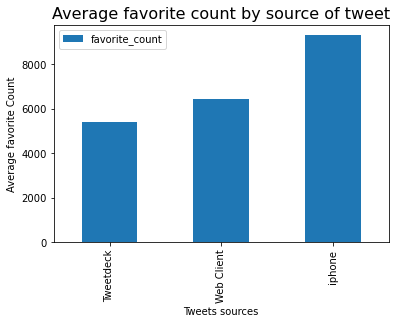

In [65]:
#Plot the most fovarite dogs based on sources of tweets
df.query('p3_dog==True').groupby('source')['favorite_count'].mean().plot(kind='bar')
plt.title('Average favorite count by source of tweet', {'fontsize': 16})
plt.xlabel('Tweets sources')
plt.ylabel('Average favorite Count')
plt.legend()
plt.show;

### Insight 2: Among the breed of dogs based on the third prediction, what are the top 5 liked dogs?

In [66]:
# Calculate the mean of the top 5 liked dogs
df.query('p3_dog==True').groupby('dog_name')['favorite_count'].mean().sort_values(ascending=False).head(5)

dog_name
Duddles    107956.0
Stephan    107015.0
Jamesy     106827.0
Lilly       73397.0
Aja         71144.0
Name: favorite_count, dtype: float64

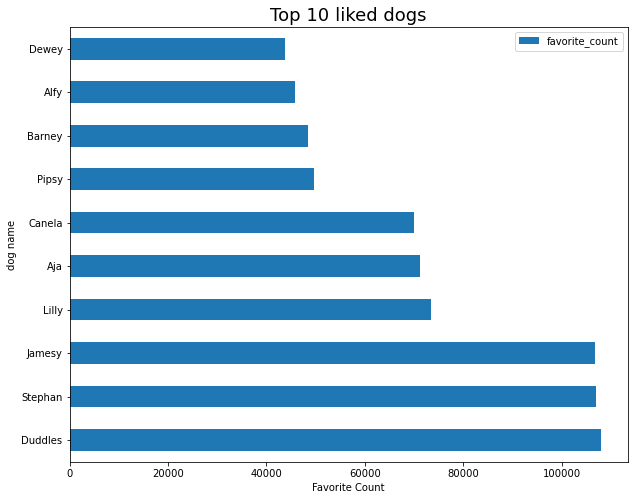

In [67]:
#visualize top 10 liked dogs
df.query('p3_dog==True').groupby('dog_name')['favorite_count'].mean().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,8))
plt.title('Top 10 liked dogs', {'fontsize':18})
plt.xlabel('Favorite Count')
plt.ylabel('dog name')
plt.legend()
plt.show();

### Insight 3: Among the breeds of dogs based on the third prediction, is there a relationship between favorite count and retweet count?

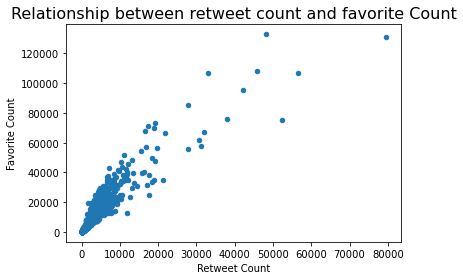

In [68]:
## Plot a scatter plot of numerator rating and favorite count
df.query('p3_dog==True').plot(x ="retweet_count", y ="favorite_count", kind='scatter')
plt.title('Relationship between retweet count and favorite Count', {'fontsize':16})
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.show();

### Insight 4: Among the breeds of dog based on the third prediction, what dog stage were the most retweeted? 

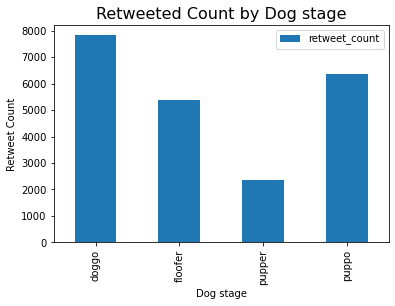

In [69]:
#plot the retweet count by dog stage 
df.query('p3_dog == True').groupby('dog_stage')['retweet_count'].mean().plot(kind="bar")
plt.legend()
plt.title('Retweeted Count by Dog stage', {'fontsize': 16})
plt.xlabel('Dog stage')
plt.ylabel('Retweet Count')
plt.show();

### Visualization

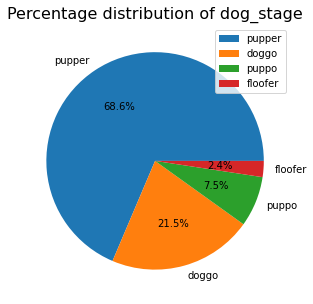

In [70]:
#plot a pie chart to see the percentage composition of the dog stage in the sample.
((df.dog_stage.value_counts()/df.dog_stage.count())*100).plot.pie(figsize=(10,5),autopct='%1.1f%%')
plt.title('Percentage distribution of dog_stage', {'fontsize':16})
plt.ylabel('')
plt.legend()
plt.show();


In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

1